In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from numba import jit
from sklearn.metrics import mean_squared_error

In [ ]:
img = cv2.imread("Elaine.bmp", 0)

In [ ]:
@jit(nopython=True)
def quantization_map(quantization_value):
  section_range = 255 // (quantization_value - 1)

  map = np.zeros(quantization_value)

  for section in range(quantization_value - 1):    
    map[section] = section * section_range
  
  map[quantization_value - 1] = 255
  
  return map

In [ ]:
@jit(nopython=True)
def quantization(image, quantization_value):
  quantized_image = np.zeros_like(image)

  quantization_range = quantization_map(quantization_value)

  for row in range (R):
    for col in range (C):
      for index in range(quantization_value - 1):
        if image[row][col] >= quantization_range[index] and image[row][col] < quantization_range[index + 1]:
          quantized_image[row][col] = quantization_range[index]
          break
        if image[row][col] == 255:
          quantized_image[row][col] = 255
          break
  
  return quantized_image

In [ ]:
@jit(nopython=True)
def histogram(image):
  R, C = image.shape

  histogram_array = np.zeros(256)

  for r in range (R):
    for c in range (C):
      histogram_array[int(image[r][c]) - 1] += 1
  
  return histogram_array

Text(0.5, 1.0, 'Image: Original')

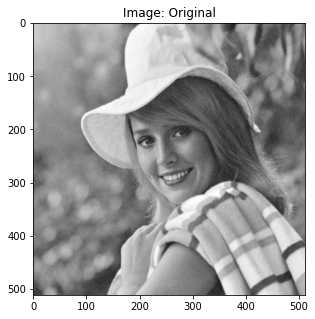

In [ ]:
fig, plot = plt.subplots(1, 1, figsize = (5, 5))

plot.imshow(img, cmap='gray')
plot.set_title("Image: Original")

In [ ]:
levels = [4, 8, 16, 32, 64, 128]
R, C = img.shape

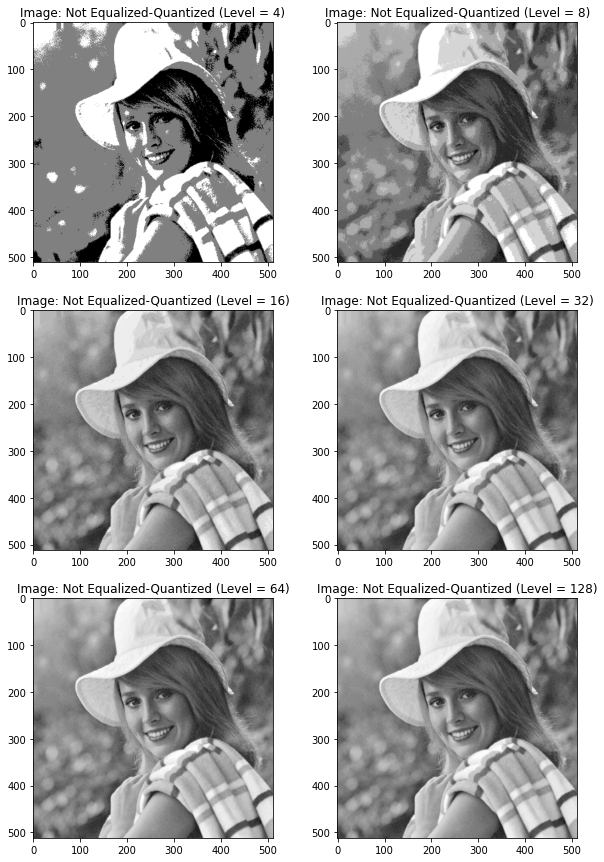

In [ ]:
# Without Histogram Equalization - Show Image

image_without_equalization = np.zeros((len(levels), R, C))
mse_without_equalization = np.zeros(len(levels))

fig, plot = plt.subplots(int(len(levels) // 2), 2, figsize = (10, 15))

for level_index in range (len(levels)):
  quantized_image = quantization(img, levels[level_index])

  mse_without_equalization[level_index] = mean_squared_error(img, quantized_image)

  plot[int(level_index // 2)][int(level_index % 2)].imshow(quantized_image, cmap='gray')
  plot[int(level_index // 2)][int(level_index % 2)].set_title("Image: Not Equalized-Quantized (Level = " + str(levels[level_index]) + ")")

  image_without_equalization[level_index, 0:R, 0:C] = quantized_image

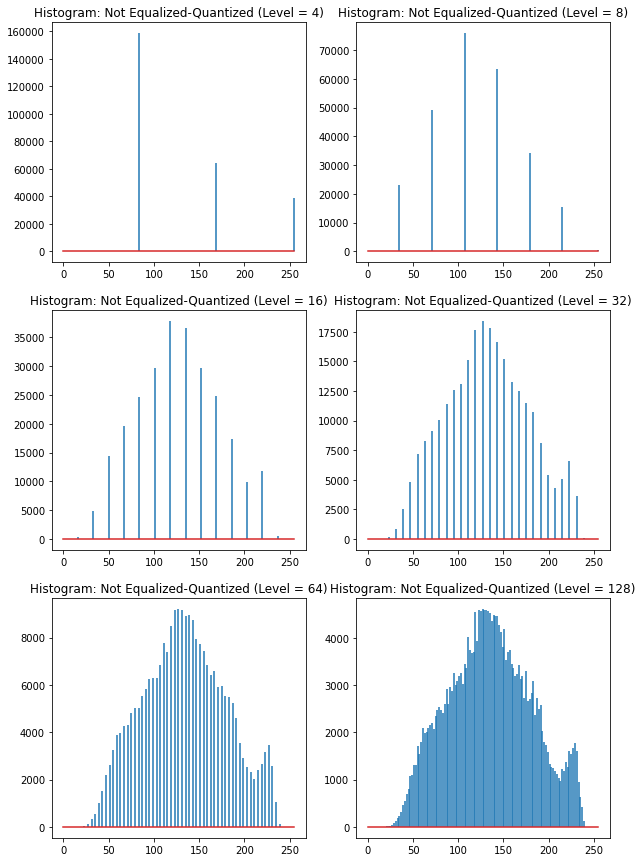

In [ ]:
# Without Histogram Equalization - Show Histogram

fig, plot = plt.subplots(int(len(levels) // 2), 2, figsize = (10, 15))

for level_index in range (len(levels)):
  plot[int(level_index // 2)][int(level_index % 2)].stem(histogram(image_without_equalization[level_index, 0:R, 0:C]), markerfmt=' ', use_line_collection=True)
  plot[int(level_index // 2)][int(level_index % 2)].set_title("Histogram: Not Equalized-Quantized (Level = " + str(levels[level_index]) + ")")

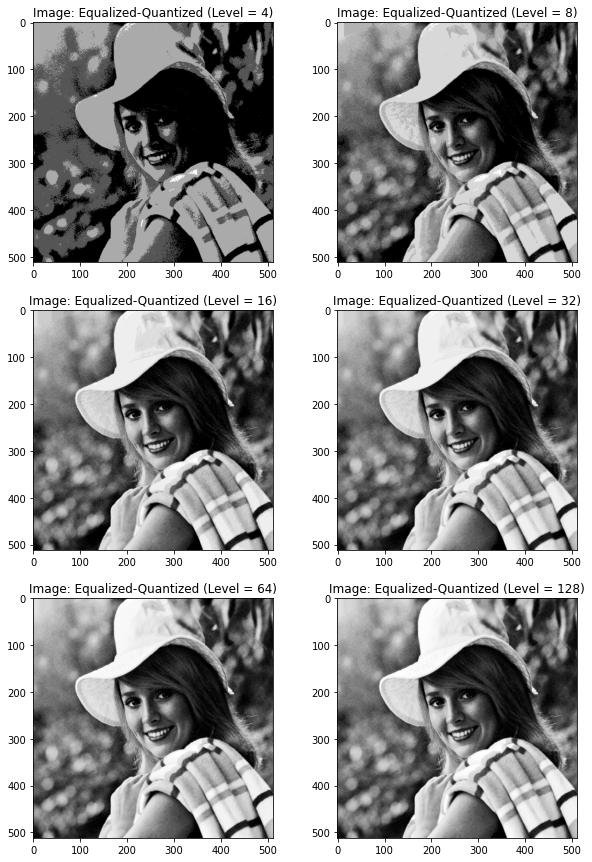

In [ ]:
# With Histogram Equalization - Show Image

equalized_image = cv2.equalizeHist(img)

image_with_equalization = np.zeros((len(levels), R, C))
mse_with_equalization = np.zeros(len(levels))

fig, plot = plt.subplots(int(len(levels) // 2), 2, figsize = (10, 15))

for level_index in range (len(levels)):
  quantized_image = quantization(equalized_image, levels[level_index])

  mse_with_equalization[level_index] = mean_squared_error(equalized_image, quantized_image)

  plot[int(level_index // 2)][int(level_index % 2)].imshow(quantized_image, cmap='gray')
  plot[int(level_index // 2)][int(level_index % 2)].set_title("Image: Equalized-Quantized (Level = " + str(levels[level_index]) + ")")

  image_with_equalization[level_index, 0:R, 0:C] = quantized_image

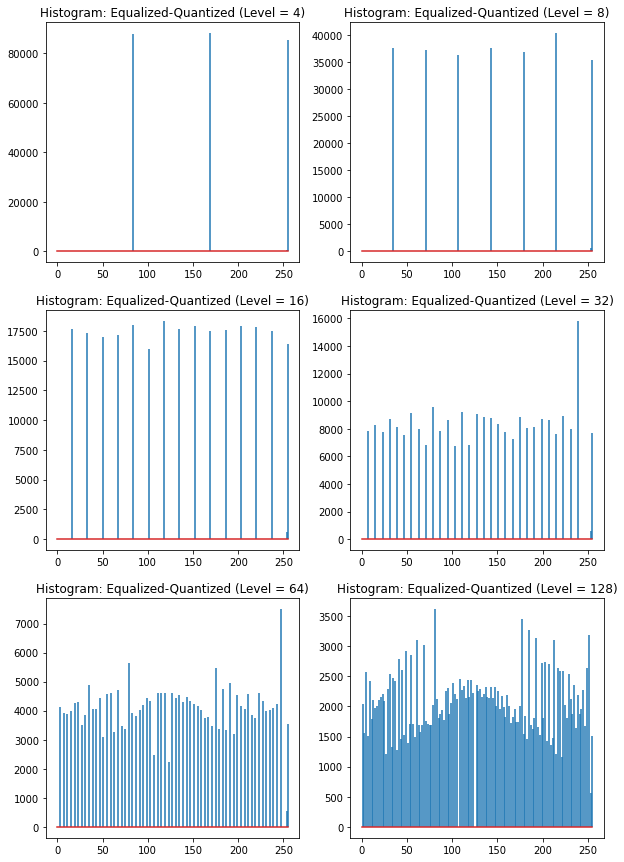

In [ ]:
# With Histogram Equalization - Show Histogram

fig, plot = plt.subplots(int(len(levels) // 2), 2, figsize = (10, 15))

for level_index in range (len(levels)):
  plot[int(level_index // 2)][int(level_index % 2)].stem(histogram(image_with_equalization[level_index, 0:R, 0:C]), markerfmt=' ', use_line_collection=True)
  plot[int(level_index // 2)][int(level_index % 2)].set_title("Histogram: Equalized-Quantized (Level = " + str(levels[level_index]) + ")")

In [ ]:
# Mean Square Error

# Not Equalized Image
print("Not Equalized Image")
for level_index in range (len(levels)):
  print("Level = " + str(levels[level_index]) + "  &  MSE = " + str(mse_without_equalization[level_index]))

# Equalized Image
print("\nEqualized Image")
for level_index in range (len(levels)):
  print("Level = " + str(levels[level_index]) + "  &  MSE = " + str(mse_with_equalization[level_index]))

Not Equalized Image
Level = 4  &  MSE = 107.34024047851562
Level = 8  &  MSE = 94.05004119873047
Level = 16  &  MSE = 73.27091598510742
Level = 32  &  MSE = 17.381858825683594
Level = 64  &  MSE = 3.4688339233398438
Level = 128  &  MSE = 0.5092544555664062

Equalized Image
Level = 4  &  MSE = 102.48192977905273
Level = 8  &  MSE = 98.46839141845703
Level = 16  &  MSE = 72.19916915893555
Level = 32  &  MSE = 20.96295928955078
Level = 64  &  MSE = 4.229194641113281
Level = 128  &  MSE = 0.5994033813476562
